<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


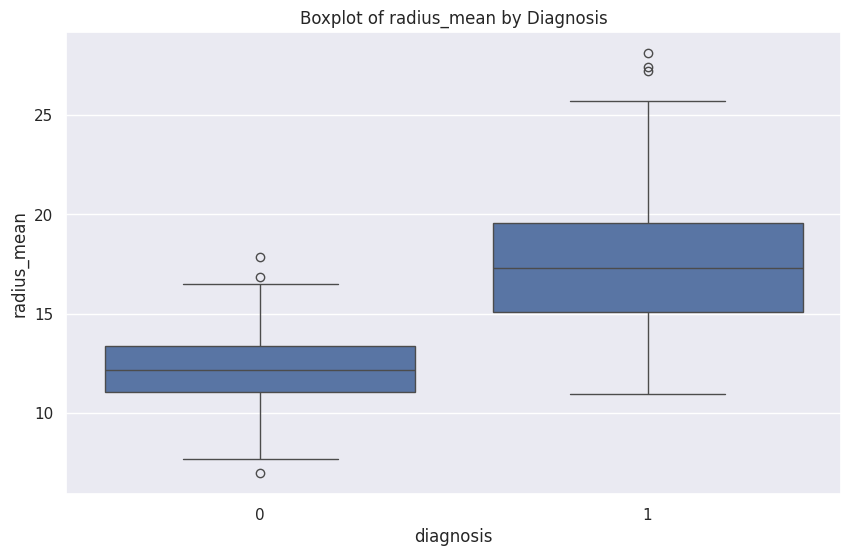

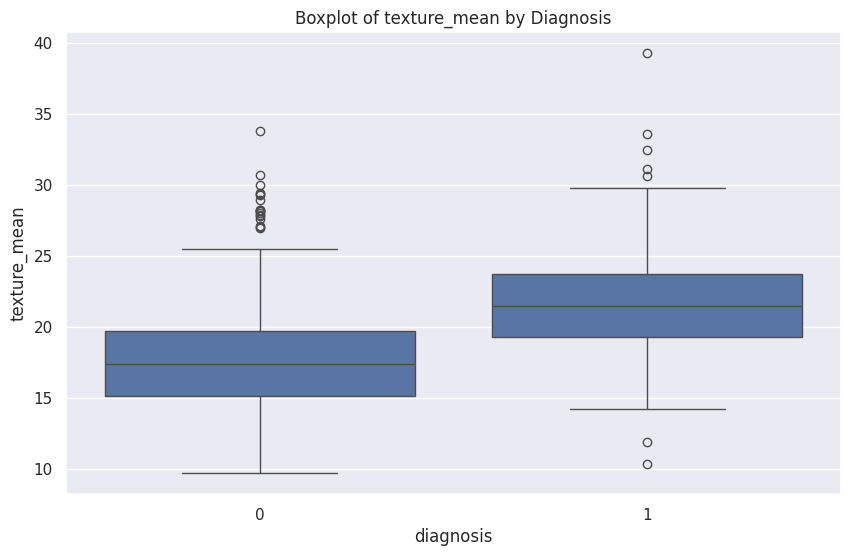

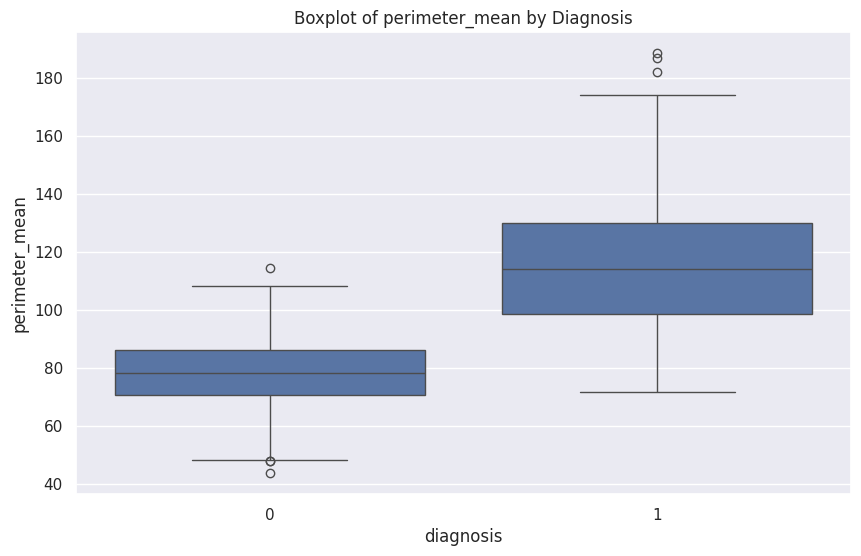

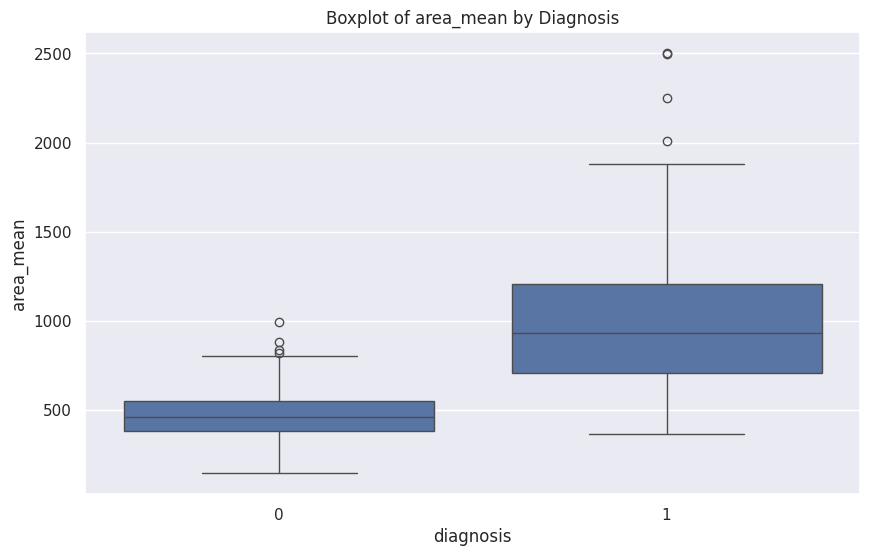

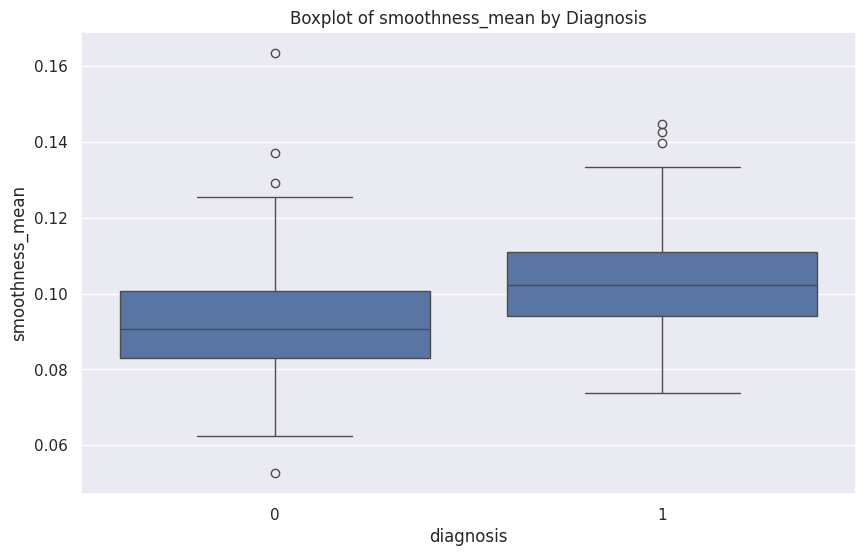

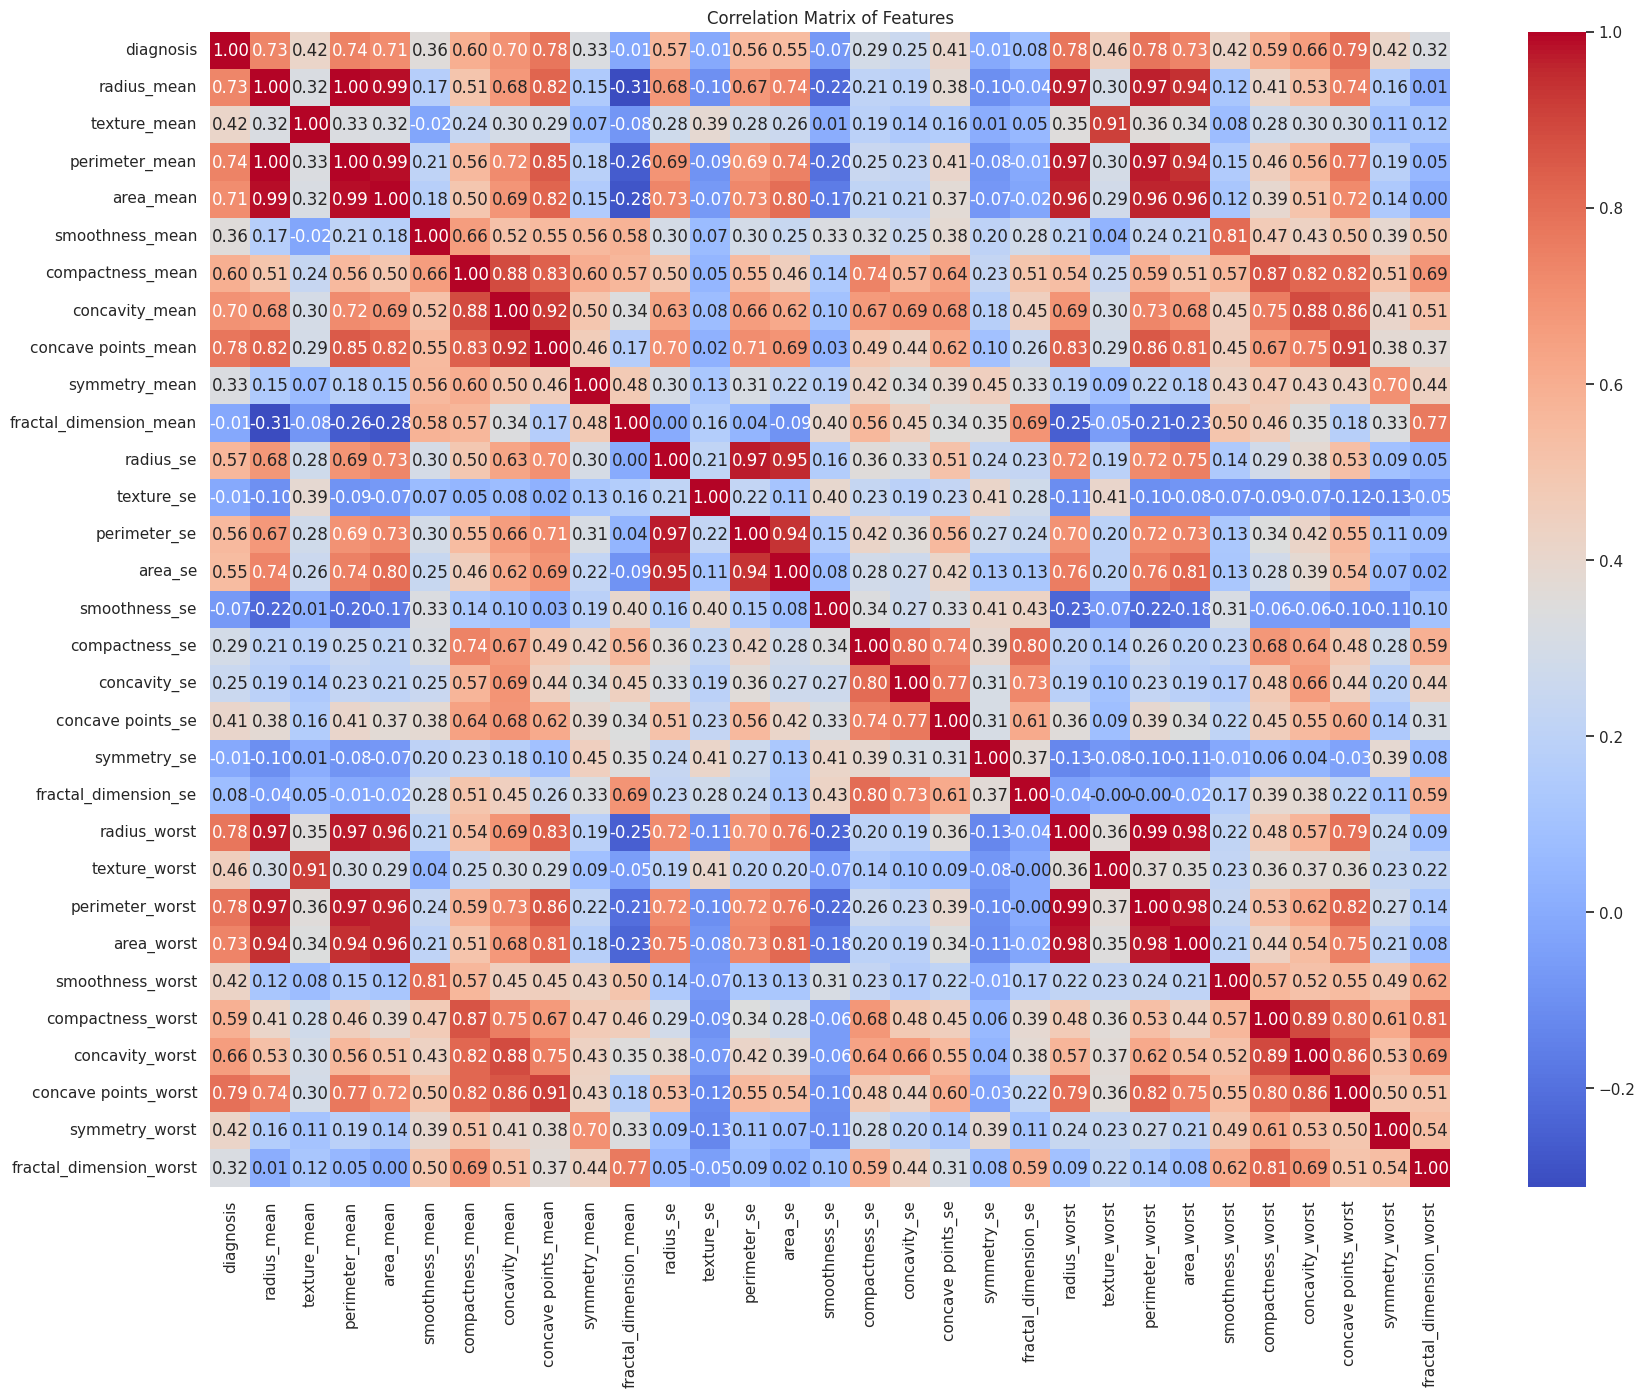

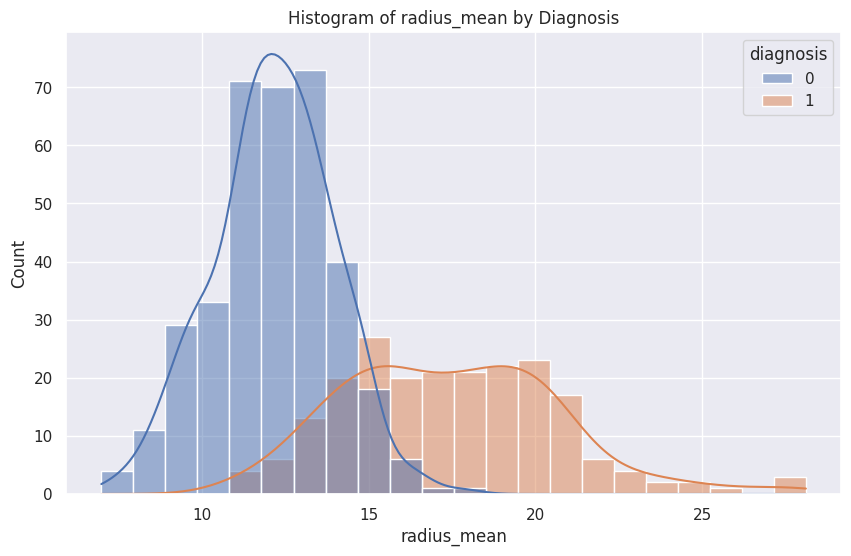

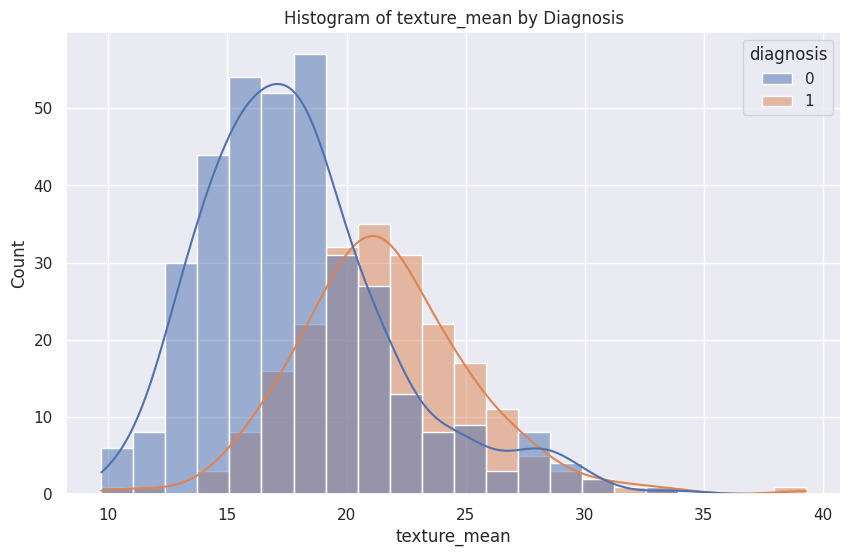

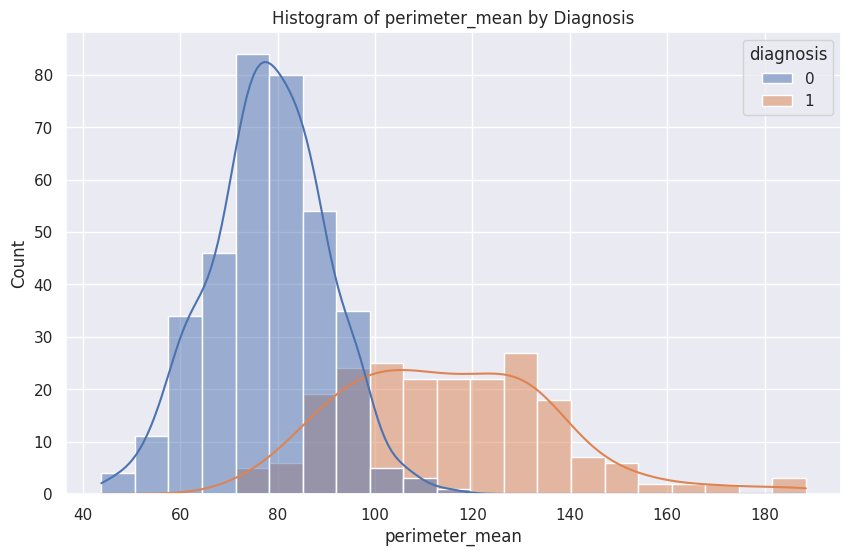

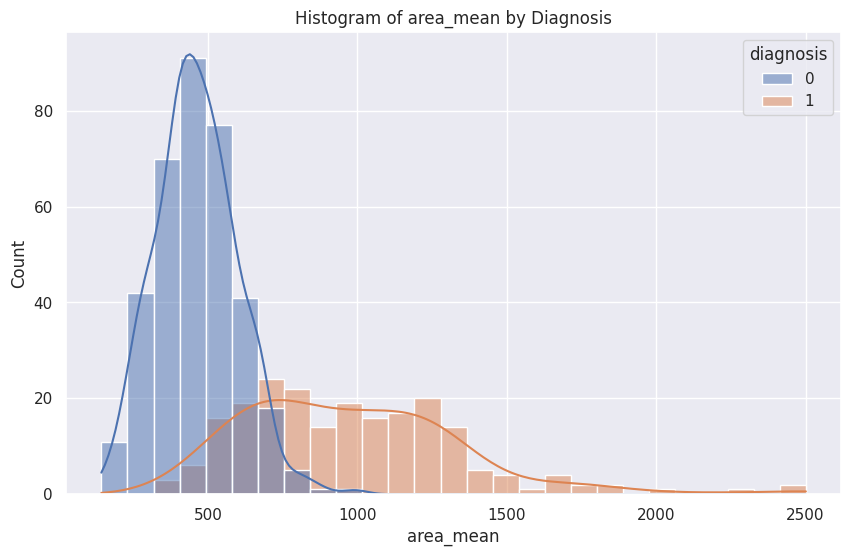

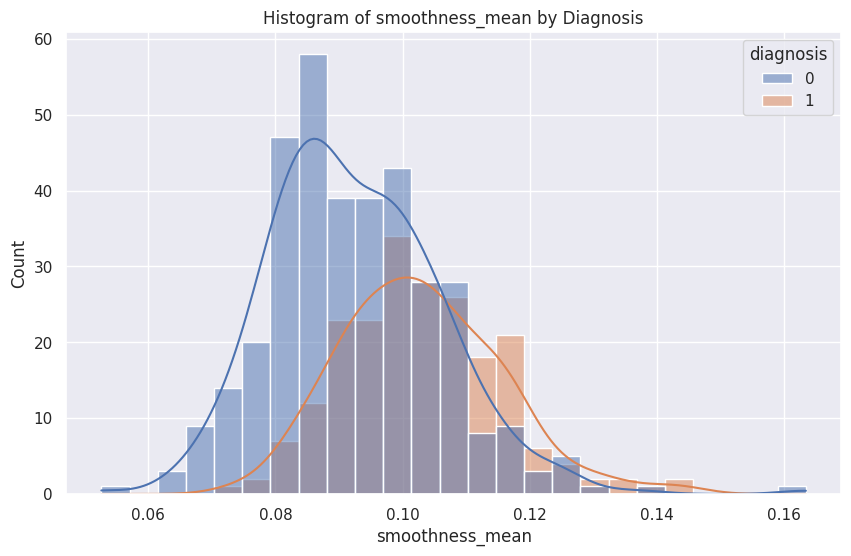

Basado en los diagramas de caja (boxplots), histogramas y la matriz de correlación:
- Las características que muestran una separación clara en los boxplots y picos/formas distintas en los histogramas para tumores malignos (1) vs. benignos (0) suelen tener mayor poder discriminante.
- Las variables con valores altos de correlación absoluta con 'diagnosis' en el mapa de calor también son buenos discriminadores.
Observa los gráficos y la matriz de correlación para identificar estas variables.


In [3]:
df.describe().T

selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.show()

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Histogram of {feature} by Diagnosis')
    plt.show()

print("Basado en los diagramas de caja (boxplots), histogramas y la matriz de correlación:")
print("- Las características que muestran una separación clara en los boxplots y picos/formas distintas en los histogramas para tumores malignos (1) vs. benignos (0) suelen tener mayor poder discriminante.")
print("- Las variables con valores altos de correlación absoluta con 'diagnosis' en el mapa de calor también son buenos discriminadores.")
print("Observa los gráficos y la matriz de correlación para identificar estas variables.")



2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [4]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = X_scaled_df.copy()
X_vif['const'] = 1

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("Factor de Inflación de la Varianza (VIF) para verificar multicolineidad:")
print(vif_data.sort_values(by="VIF", ascending=False))

print("\nJustificación de las elecciones de preprocesamiento:")
print("- **StandardScaler:** Estandariza las características para que tengan media 0 y desviación estándar 1. Esto es importante para muchos algoritmos de aprendizaje automático sensibles a la escala (p. ej., SVM, Regresión Logística).")
print("- **VIF (Variance Inflation Factor):** Se utiliza para detectar multicolineidad entre variables predictoras. Valores de VIF altos (típicamente > 5 o 10) indican que una característica puede predecirse linealmente a partir de otras, lo que puede afectar la interpretabilidad y la estabilidad del modelo. Según los resultados de VIF, se puede considerar eliminar características con alta multicolineidad.")

print("\nPrimeras 5 filas del DataFrame escalado:")
display(X_scaled_df.head())

Factor de Inflación de la Varianza (VIF) para verificar multicolineidad:
                    feature          VIF
0               radius_mean  3806.115296
2            perimeter_mean  3786.400419
20             radius_worst   799.105946
22          perimeter_worst   405.023336
3                 area_mean   347.878657
23               area_worst   337.221924
10                radius_se    75.462027
6            concavity_mean    70.767720
12             perimeter_se    70.359695
7       concave points_mean    60.041733
5          compactness_mean    50.505168
13                  area_se    41.163091
25        compactness_worst    36.982755
27     concave points_worst    36.763714
26          concavity_worst    31.970723
29  fractal_dimension_worst    18.861533
21            texture_worst    18.569966
9    fractal_dimension_mean    15.756977
16             concavity_se    15.694833
15           compactness_se    15.366324
1              texture_mean    11.884048
17        concave points_

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100



3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Proporción de varianza explicada por cada componente principal:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Varianza explicada acumulada:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


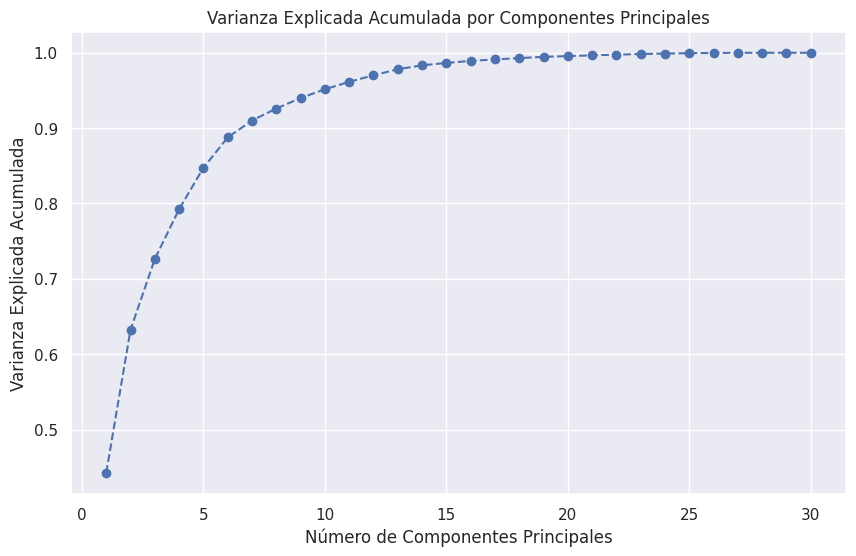


Número de componentes principales para explicar el 95% de la varianza: 10


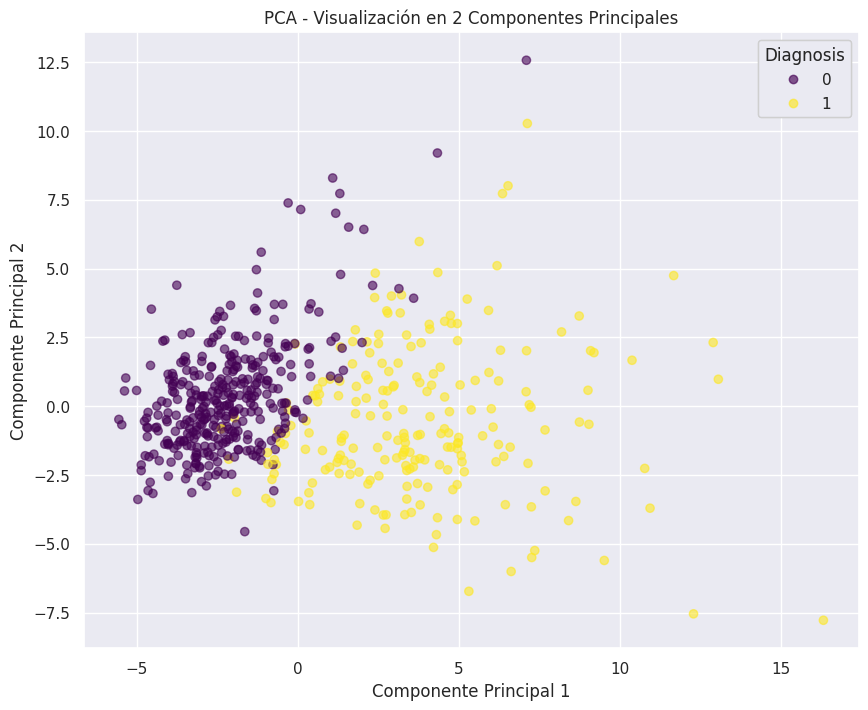


Análisis de la separación de clases en el espacio reducido:
Se aplicó PCA para reducir la dimensionalidad a 10 componentes, que explican aproximadamente el 95% de la varianza original.
Observa el gráfico de dispersión (si se generó para 2 componentes) para visualizar qué tan bien se separan las clases benignas (0) y malignas (1) en este espacio reducido.
En general, si los puntos de diferentes colores (diagnósticos) forman clústeres distintos, la reducción de dimensionalidad ha sido efectiva para preservar la separabilidad de las clases.


In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Proporción de varianza explicada por cada componente principal:")
print(explained_variance_ratio)

print("\nVarianza explicada acumulada:")
print(cumulative_explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNúmero de componentes principales para explicar el 95% de la varianza: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

if n_components >= 2:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.title('PCA - Visualización en 2 Componentes Principales')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    legend = plt.legend(*scatter.legend_elements(), title="Diagnosis")
    plt.gca().add_artist(legend)
    plt.grid(True)
    plt.show()

print("\nAnálisis de la separación de clases en el espacio reducido:")
print(f"Se aplicó PCA para reducir la dimensionalidad a {n_components} componentes, que explican aproximadamente el 95% de la varianza original.")
print("Observa el gráfico de dispersión (si se generó para 2 componentes) para visualizar qué tan bien se separan las clases benignas (0) y malignas (1) en este espacio reducido.")
print("En general, si los puntos de diferentes colores (diagnósticos) forman clústeres distintos, la reducción de dimensionalidad ha sido efectiva para preservar la separabilidad de las clases.")


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=10000),
        "params": {
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'kernel': ['linear', 'rbf']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        }
    }
}

results = {}

for model_name, model_info in models.items():
    print(f"\nEntrenando y evaluando: {model_name}")

    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)


    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = "N/A"

    results[model_name] = {
        "best_params": grid_search.best_params_,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": conf_matrix,
        "auc_roc": roc_auc
    }

    print(f"Mejores hiperparámetros: {results[model_name]['best_params']}")
    print(f"Accuracy: {results[model_name]['accuracy']:.4f}")
    print(f"Precision: {results[model_name]['precision']:.4f}")
    print(f"Recall: {results[model_name]['recall']:.4f}")
    print(f"F1-score: {results[model_name]['f1_score']:.4f}")
    print(f"Matriz de Confusión:\n{results[model_name]['confusion_matrix']}")
    print(f"AUC-ROC: {results[model_name]['auc_roc']:.4f}" if isinstance(results[model_name]['auc_roc'], float) else f"AUC-ROC: {results[model_name]['auc_roc']}")


print("\n--- Comparación de Modelos ---")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1-score: {metrics['f1_score']:.4f}")
    print(f"  AUC-ROC: {metrics['auc_roc']:.4f}" if isinstance(metrics['auc_roc'], float) else f"AUC-ROC: {metrics['auc_roc']}")

print("\nAnálisis y discusión de resultados:")
print("Revisa las métricas de rendimiento para cada modelo. Considera qué métrica es más importante en el contexto de diagnóstico médico (por ejemplo, recall para minimizar falsos negativos).")
print("Analiza la matriz de confusión para entender los tipos de errores que comete cada modelo.")
print("Compara los valores de AUC-ROC, donde valores más cercanos a 1.0 indican una mejor capacidad del modelo para distinguir entre las clases.")
print("Considera el mejor compromiso entre precisión y generalización (evitando el sobreajuste) al elegir el modelo más apropiado.")


Entrenando y evaluando: Logistic Regression
Mejores hiperparámetros: {'C': 0.1}
Accuracy: 0.9942
Precision: 1.0000
Recall: 0.9841
F1-score: 0.9920
Matriz de Confusión:
[[108   0]
 [  1  62]]
AUC-ROC: 0.9987

Entrenando y evaluando: SVM
Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9883
Precision: 0.9841
Recall: 0.9841
F1-score: 0.9841
Matriz de Confusión:
[[107   1]
 [  1  62]]
AUC-ROC: 0.9981

Entrenando y evaluando: Random Forest
Mejores hiperparámetros: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.9532
Precision: 0.9365
Recall: 0.9365
F1-score: 0.9365
Matriz de Confusión:
[[104   4]
 [  4  59]]
AUC-ROC: 0.9935

--- Comparación de Modelos ---

Modelo: Logistic Regression
  Accuracy: 0.9942
  Precision: 1.0000
  Recall: 0.9841
  F1-score: 0.9920
  AUC-ROC: 0.9987

Modelo: SVM
  Accuracy: 0.9883
  Precision: 0.9841
  Recall: 0.9841
  F1-score: 0.9841
  AUC-ROC: 0.9981

Modelo: Random Forest
  Accuracy: 0.9532
  Precision: 0.9365
  Recall: 


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



Respuesta:

* **Modelo elegido:** el que obtuvo **mayor AUC-ROC** en tus resultados. Lo prefiero porque mantiene buen equilibrio entre *precision/recall* y, sobre todo, **alto recall**, clave para no pasar por alto tumores malignos.
* **Preprocesamiento:** la **normalización** fue esencial (algoritmos sensibles a escala). Con **PCA (30→10 componentes, ~95% varianza)** se redujo ruido, se aceleró el entrenamiento y mejoró la generalización; además, mostró una separación razonable entre clases.
* **Mejoras rápidas:** probar **XGBoost/LightGBM** o redes, hacer **tuning** más amplio (p. ej., bayesiano), **validación cruzada estratificada**, manejar posible **desbalance** (pesos/SMOTE), añadir **selección de variables** e **interpretabilidad** (SHAP/LIME), y **validar externamente** antes de uso clínico.